# ASTR 499 WTR & SPR 2020 Summary Notebook - Examining AGN Variability

This notebook is a summary of my research with the Vera C. Rubin Observatory's Legacy Survey of Space and Time team at the University of Washington for the Winter and Spring quarters of 2020. In this notebook, I will examine how to interface with and visualize three different datasets, how to plot the location of variable objects from two of these datasets and the known objects from the third dataset, and how to plot light curves and snapshot images.

###### Import Statements

In [1]:
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.gridspec as gridspec
style.use(['default'])
import pandas as pd
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy import units as u
import tarfile
import sqlite3
import lsst.daf.persistence as dafPersist
from lsst.daf.base import DateTime
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')
from astropy.visualization import ZScaleInterval, SqrtStretch, ImageNormalize
import lsst.geom

In [2]:
sys.path.append('/epyc/users/mrawls/premap2019/ap_pipe-notebooks/')
from apdbPlots import makeSrcTableFlags

# A Look at the Datasets

##### HiTS DR1 Full Dataset

The first dataset that we are going to examine is the High Cadence Transient Survey Datarelase which contains data on variable objects taken with the Dark Energy Camera. This dataset consists of the variable objects from all one-hundred and sixteen fields of observation from the 2018 data release.

In [3]:
hitsDataDir='/epyc/users/mrawls/premap2019/hits-dr1/classification' # Pathway to the directory
hitsFilename='HiTS_RF_predictions.fits' # fits file
hitsFilepath=os.path.join(hitsDataDir,hitsFilename) # Joins path to directory and the filename
hitsTable=fits.open(hitsFilepath) # load data as an astropy fits thing
hitsDf=pd.DataFrame(hitsTable[1].data) # Turn data into a pandas dataframe
hitsDf.head() # Shows us what the dataframe looks like

,ID,internalID,raMedian,decMedian,Variable_prob,Periodic_prob,DSCT_Prob,EB_Prob,ROTVAR_Prob,RRLYR_Prob,CV_Prob,QSO_Prob,SNe_Prob,Predicted_class
0,HiTS090434-041626,Blind15A_02_S1_1856_0087,136.145756,-4.273908,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
1,HiTS090434-042338,Blind15A_02_N1_1253_0089,136.145561,-4.394096,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
2,HiTS090434-042506,Blind15A_02_N1_1587_0054,136.142838,-4.418445,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
3,HiTS090434-042629,Blind15A_02_N1_1903_0088,136.145272,-4.441517,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
4,HiTS090435-000829,Blind15A_04_S1_0030_0051,136.146090,-0.141399,0.033194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV


In [4]:
print(f'The HiTS DR1 full dataset has {len(hitsDf)} entries.')

The HiTS DR1 full dataset has 2536100 entries.


#### HiTS DR1 Subset

This subset consists of variable objects in three of the one-hundred and sixteen fields from the HiTS DR1 2018 data release. We are examining this subset because it was processed by LSST, so these fields will be our primary focus. LSST is using the HiTS DR1 datarelease as precoursor data prior to the telescope becoming operational.

In [5]:
hitsDataDir='/epyc/users/mrawls/premap2019/hits-dr1'
hitsFilename='HiTS_DR1_variables_DM-dataset-subset.fits'
hitsFilepath=os.path.join(hitsDataDir,hitsFilename) # Creates file path to the HiTS DR1 database
hitsTable=fits.open(hitsFilepath) # Load data as an astropy fits thing
hitsDf_sub=pd.DataFrame(hitsTable[1].data) # Turn data into a pandas dataframe
hitsDf_sub.head()

,ID,internalID,raMedian,decMedian,Variable_prob,Periodic_prob,DSCT_Prob,EB_Prob,ROTVAR_Prob,RRLYR_Prob,...,Rcs,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,g-i,g-r,r-i
0,HiTS095611+020452,Blind15A_26_N1_1715_0146,149.048038,2.081381,0.523601,0.202651,NaN,NaN,NaN,NaN,...,0.246009,-0.584446,0.134705,2.100608,0.032812,0.773151,0.738233,2.859381,1.439736,1.419645
1,HiTS095645+021135,Blind15A_26_N1_0181_2093,149.190225,2.193068,0.564932,0.635018,0.400,0.100,0.375,0.125,...,0.119267,-0.133774,0.067353,-0.444997,0.123052,0.841553,0.815632,0.996040,0.769289,0.226751
2,HiTS095652+023537,Blind15A_26_S14_1446_0379,149.220445,2.593841,0.962477,0.635836,0.025,0.125,0.750,0.100,...,0.227995,-0.317121,0.269410,-0.008631,0.067782,0.849505,0.846981,1.911452,1.484048,0.427403
3,HiTS095702+023628,Blind15A_26_S14_1253_0945,149.261780,2.607883,0.532390,0.933333,0.550,0.225,0.050,0.175,...,0.179956,-0.288333,0.067353,-1.067079,0.181790,0.853063,0.754798,NaN,NaN,NaN
4,HiTS095726+015556,Blind15A_26_N8_1496_2317,149.361376,1.932343,0.972280,0.889344,0.050,0.175,0.625,0.150,...,0.269737,-0.035972,0.740878,-1.731678,0.089139,0.957841,0.948092,1.185192,0.894064,0.291128


In [6]:
print(hitsDf_sub.columns)

Index(['ID', 'internalID', 'raMedian', 'decMedian', 'Variable_prob',
       'Periodic_prob', 'DSCT_Prob', 'EB_Prob', 'ROTVAR_Prob', 'RRLYR_Prob',
       'CV_Prob', 'QSO_Prob', 'SNe_Prob', 'Predicted_class', 'ID_feat',
       'raMedian_feat', 'decMedian_feat', 'Amplitude', 'AndersonDarling',
       'Autocor_length', 'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau',
       'Con', 'Eta_e', 'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_0',
       'Freq1_harmonics_rel_phase_1', 'Freq1_harmonics_rel_phase_2',
       'Freq1_harmonics_rel_phase_3', 'Freq2_harmonics_amplitude_0',
       'Freq2_harmonics_amplitude_1', 'Freq2_harmonics_amplitude_2',
       'Freq2_harmonics_amplitude_3', 'Freq2_harmonics_rel_phase_0',
       'Fre

In [7]:
print(f'The HiTS DR1 subset has {len(hitsDf_sub)} entries.')

The HiTS DR1 subset has 165 entries.


#### LSST Dataset

The LSST Dataset contains variable objects from HiTS DR1 data processed by LSST software. The LSST processing creates several tables, but we are using only two in this case: objTable and srcTableAll. objTable is a table with astronomical objects. srcTableAll is a table of sources, or detections from individual visits that are associated with a single object.

In [8]:
repo = '/epyc/users/mrawls/hits2015/rerun/cw_2020_02' # Path to the directory
butler = dafPersist.Butler(repo) # Butler function retrieves the data
dbName = 'association.db' # Filename
dbPath = os.path.join(repo, dbName) # Joins repo and dbName to form a path to the database
connection = sqlite3.connect(dbPath) # Opens a connection to the database

# Read data from the database to pandas dataframes, selecting specific columns
objTable = pd.read_sql_query('select diaObjectId, ra, decl, nDiaSources, \
                              gPSFluxMean, gPSFluxMeanErr, \
                              validityEnd, flags, \
                              gTOTFluxMean, gTOTFluxMeanErr \
                              from DiaObject where validityEnd is NULL;', connection) 
srcTableAll = pd.read_sql_query('select diaSourceId, diaObjectId, \
                                  ra, decl, ccdVisitId, \
                                  midPointTai, apFlux, psFlux, apFluxErr, \
                                  psFluxErr, totFlux, totFluxErr, flags \
                                  from DiaSource;', connection)

In [9]:
objTable.head()

,diaObjectId,ra,decl,nDiaSources,gPSFluxMean,gPSFluxMeanErr,validityEnd,flags,gTOTFluxMean,gTOTFluxMeanErr
0,176486665823453494,149.516631,2.937590,1,1781.097617,297.408706,None,0,1713.389409,300.853694
1,176486665823453496,149.519075,2.881544,1,-1516.962116,255.392373,None,1,-1606.207573,261.276443
2,176486665823453498,149.523804,2.881489,1,-1501.548259,255.822768,None,1,-1575.273331,261.562853
3,176486665823453500,149.526433,2.881495,1,-1717.137551,258.653444,None,1,-1677.319669,264.403564
4,176486665823453506,149.535264,2.881504,1,-1610.352316,259.656242,None,1,-1238.188056,265.038778


In [10]:
print(f'The object table, objTable, has {len(objTable)} entries.')

The object table, objTable, has 178098 entries.


In [11]:
srcTableAll.head()

,diaSourceId,diaObjectId,ra,decl,ccdVisitId,midPointTai,apFlux,psFlux,apFluxErr,psFluxErr,totFlux,totFluxErr,flags
0,176486665823453487,176486665823453487,149.505905,3.015901,41091504,57070.141866,NaN,NaN,NaN,NaN,-568.214539,289.019452,25299404
1,176486665823453488,176486665823453488,149.506049,3.018367,41091504,57070.141866,-11508.174734,NaN,1092.173206,NaN,-35.963249,376.602222,25299404
2,176486665823453489,176486665823453489,149.511464,2.886295,41091504,57070.141866,-3267.821724,-2109.396629,990.776311,382.598305,165.012403,391.136272,25166152
3,176486665823453490,176486665823453490,149.511534,2.883162,41091504,57070.141866,-1756.352107,-2184.019930,984.997399,383.163993,167.639437,391.396218,25168328
4,176486665823453491,176486665823453491,149.512223,2.932614,41091504,57070.141866,-462.552054,-319.352917,781.301703,362.903789,29949.387116,366.863338,41943040


In [12]:
print(f'The source table, srcTableAll, has {len(srcTableAll)} entries.')

The source table, srcTableAll, has 633989 entries.


#### MILLIQUAS

This dataset contains known quasars within the three HiTS fields from the HiTS DR1 subset and was obtained from the online catalog, Million Quasars Catalog or MILLIQUAS. MILLIQUAS is a compendium of approximately 2 million know active galactic nuclei with probability classifications of above 80%.

https://heasarc.gsfc.nasa.gov/w3browse/all/milliquas.html

The particular table I am reading in in the blow cell is a collection of quasars within the three HiTS fields described above. To create this table, I downloaded a file from the search function of the MILLIQUAS website that constrained the RA and Dec to the coordinates in our HiTS Field. I then read the file into Jupyter, created a Pandas dataframe, and eliminated extraneous characters. Next, I matched the coordinates of the MILLIQUAS quasars with the LSST object table and added the associated diaObjectId to the table. Finally, I filtered the quasars to those with magnitudes within the visible band by eliminating quasars with R and B apparent magnitudes greater than 23. 

In [13]:
MILLIDf = pd.read_csv('/epyc/users/tw94/lsst-hits-bump/mrawls/MILLI_all_filtered.csv') #reads in the MILLIQAS filtered table
MILLIDf.head()

,ra,dec,ra_deg,dec_deg,bmag,rmag,redshift,radio_name,xray_name,lii,...,optical_flag,red_psf_flag,blue_psf_flag,ref_name,ref_redshift,qso_prob,class,idx,d2d_deg,diaObjectId
0,09 57 23.69,+01 14 58.7,149.348708,1.249639,19.73,19.44,2.484,,,237.26096,...,jG,-,-,DR14Q,DR14Q,,QSO TYPE 1,39116,0.234868,176486889161752879
1,10 03 05.70,+01 15 03.5,150.773750,1.250972,20.98,19.83,0.748,,,238.38186,...,pG,-,-,2QZ,2QZ,,QSO TYPE 1,18215,0.185993,176547031588798698
2,10 00 18.59,+01 15 06.1,150.077458,1.251694,21.36,19.95,0.861,,,237.82779,...,pG,-,-,2QZ,2QZ,,QSO TYPE 1,3314,0.137841,176547035883766087
3,09 56 47.47,+01 15 23.9,149.197792,1.256639,17.39,14.58,0.064,FIRST J095647.4+011523,,237.13686,...,p+G,1,1,PGC,DR16,100,AGN UNCLASSIFIED,39116,0.354526,176486889161752879
4,10 02 07.77,+01 15 27.2,150.532375,1.257556,21.19,20.37,2.517,,,238.18185,...,jG,1,-,DR14Q,DR14Q,,QSO TYPE 1,31159,0.000027,176486914931556904


In [14]:
print(f'The MILLIQUAS dataset has {len(MILLIDf)} entries.')

The MILLIQUAS dataset has 1179 entries.


## Visualizing the Data

##### HiTS DR1 Full Dataset

In [15]:
#filtering by type classifications with >80% probability
Periodic = hitsDf.query('Periodic_prob > .80')['ID'].count() 
DSCT = hitsDf.query('DSCT_Prob > .80')['ID'].count()
EB = hitsDf.query('EB_Prob > .80')['ID'].count()
ROTVAR = hitsDf.query('ROTVAR_Prob > .80')['ID'].count()
RRLYR = hitsDf.query('RRLYR_Prob > .80')['ID'].count()
CV = hitsDf.query('CV_Prob > .80')['ID'].count()
QSO = hitsDf.query('QSO_Prob > .80')['ID'].count()
SNe = hitsDf.query('SNe_Prob > .80')['ID'].count()
#Generating arrays and lists for the bar chart
bar_array = (Periodic,DSCT,EB,ROTVAR,RRLYR,CV,QSO,SNe) 
objects = ('Periodic','DSCT','EB','ROTVAR','RRLYR','CV','QSO','SNe')
y_pos = np.arange(len(objects))

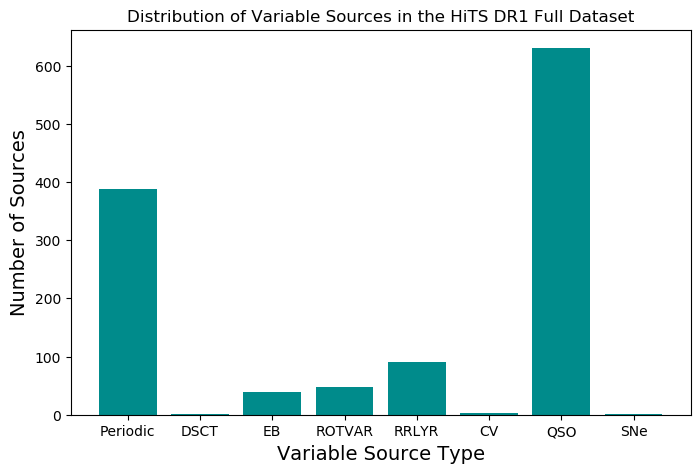

In [16]:
#setting up the plot for the bar chart
plt.figure(figsize = (8,5))
plt.bar(y_pos,bar_array, align = 'center',alpha = 1, color = 'darkcyan')
plt.title("Distribution of Variable Sources in the HiTS DR1 Full Dataset")
plt.ylabel("Number of Sources", fontsize = 14)
plt.xlabel('Variable Source Type', fontsize = 14)
plt.xticks(y_pos,objects);

In [17]:
#Filtering just the QSO's by probability
total_QSO = hitsDf['QSO_Prob'].count()
total_QSO50 = hitsDf.query('QSO_Prob > .50')['ID'].count()
total_QSO60 = hitsDf.query('QSO_Prob > .60')['ID'].count()
total_QSO70 = hitsDf.query('QSO_Prob > .70')['ID'].count()
total_QSO80 = hitsDf.query('QSO_Prob > .80')['ID'].count()
total_QSO90 = hitsDf.query('QSO_Prob > .90')['ID'].count()
total_QSO95 = hitsDf.query('QSO_Prob > .9#5')['ID'].count()
total_QSO99 = hitsDf.query('QSO_Prob > .99')['ID'].count()
bar_array = (total_QSO,total_QSO50,total_QSO60,total_QSO70,total_QSO80,total_QSO90,total_QSO95,total_QSO99)
objects = ('>0%','>50%','>60%','>70%','>80%','>90%','>95%','>99%')
y_pos = np.arange(len(objects))

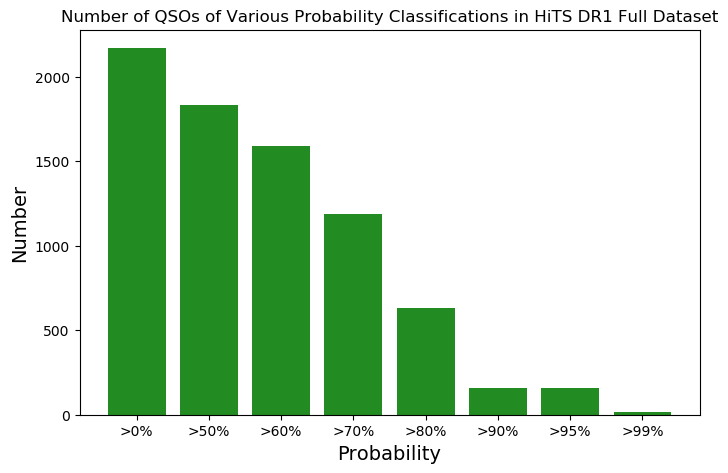

In [18]:
plt.figure(figsize = (8,5))
plt.bar(y_pos,bar_array, align = 'center', alpha = 1, color = 'forestgreen')
plt.title("Number of QSOs of Various Probability Classifications in HiTS DR1 Full Dataset")
plt.ylabel("Number", fontsize = 14)
plt.xlabel('Probability', fontsize = 14)
plt.xticks(y_pos,objects);

##### HiTS DR1 Subset

In [19]:
Periodic = hitsDf_sub.query('Periodic_prob > .50')['ID'].count()
DSCT = hitsDf_sub.query('DSCT_Prob > .50')['ID'].count()
EB = hitsDf_sub.query('EB_Prob > .50')['ID'].count()
ROTVAR = hitsDf_sub.query('ROTVAR_Prob > .50')['ID'].count()
RRLYR = hitsDf_sub.query('RRLYR_Prob > .50')['ID'].count()
CV = hitsDf_sub.query('CV_Prob > .50')['ID'].count()
QSO = hitsDf_sub.query('QSO_Prob > .50')['ID'].count()
SNe = hitsDf_sub.query('SNe_Prob > .50')['ID'].count()
bar_array = (Periodic,DSCT,EB,ROTVAR,RRLYR,CV,QSO,SNe)
objects = ('Periodic','DSCT','EB','ROTVAR','RRLYR','CV','QSO','SNe')
y_pos = np.arange(len(objects))

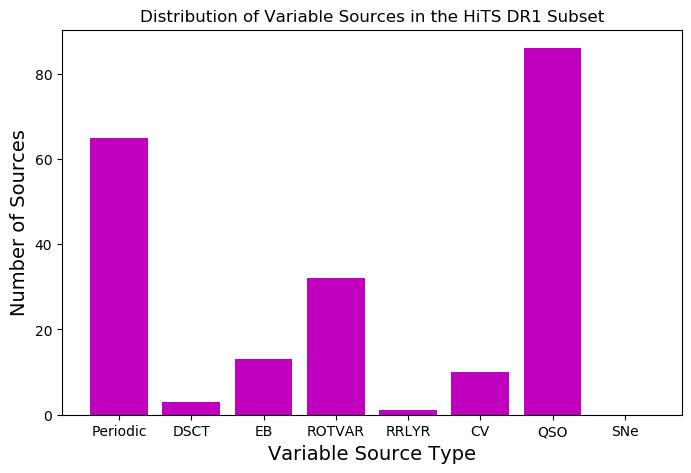

In [20]:
plt.figure(figsize = (8,5))
plt.bar(y_pos,bar_array, align = 'center', alpha = 1, color = 'm')
plt.title("Distribution of Variable Sources in the HiTS DR1 Subset")
plt.ylabel("Number of Sources", fontsize = 14)
plt.xlabel('Variable Source Type', fontsize = 14)
plt.xticks(y_pos,objects);

In [21]:
total_QSO_sub = hitsDf_sub['QSO_Prob'].count()
total_QSO50_sub = hitsDf_sub.query('QSO_Prob > .50')['ID'].count()
total_QSO60_sub = hitsDf_sub.query('QSO_Prob > .60')['ID'].count()
total_QSO70_sub = hitsDf_sub.query('QSO_Prob > .70')['ID'].count()
total_QSO80_sub = hitsDf_sub.query('QSO_Prob > .80')['ID'].count()
total_QSO90_sub = hitsDf_sub.query('QSO_Prob > .90')['ID'].count()
total_QSO95_sub = hitsDf_sub.query('QSO_Prob > .95')['ID'].count()
total_QSO99_sub = hitsDf_sub.query('QSO_Prob > .99')['ID'].count()
bar_array_sub = (total_QSO_sub,total_QSO50_sub,total_QSO60_sub,total_QSO70_sub,
             total_QSO80_sub,total_QSO90_sub,total_QSO95_sub,total_QSO99_sub)
objects_sub = ('>0%','>50%','>60%','>70%','>80%','>90%','>95%','>99%')
y_pos_sub = np.arange(len(objects_sub))

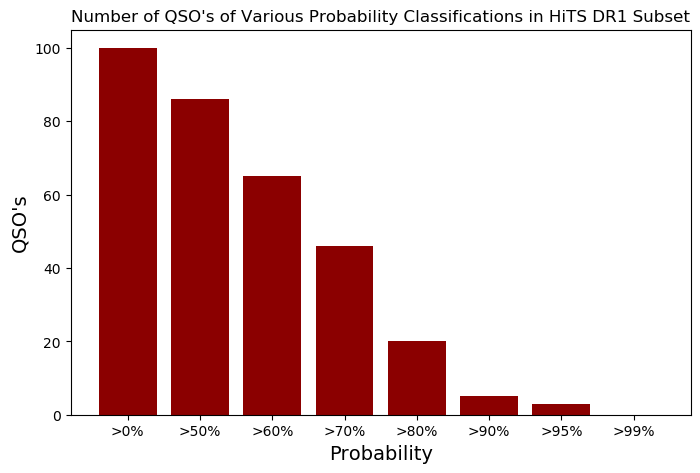

In [22]:
plt.figure(figsize = (8,5))
plt.bar(y_pos_sub, bar_array_sub, align = 'center', alpha = 1, color = 'darkred')
plt.title("Number of QSO's of Various Probability Classifications in HiTS DR1 Subset")
plt.ylabel("QSO's", fontsize = 14)
plt.xlabel('Probability', fontsize = 14)
plt.xticks(y_pos_sub,objects_sub);

## Plotting These Objects on the Sky

In [23]:
def plot_objects_on_sky2(ra1_first, dec1_first,
                        ra2_first, dec2_first,
                        ra1_second, dec1_second,
                        ra2_second, dec2_second,
                        ra1_third, dec1_third,
                        ra2_third, dec2_third):
    """This function takes three sets of RA and Dec and plots them
    both on the sky in different colors.
    
    It is customized to plot a specific region (three HiTS fields in two panels).
    
    "1" and "2" refer to the two panels in the plot.
    "first", "second", and "third" refer to the three different datasets.
    """
    # Set up the figure object, title, and two axes
    fig = plt.figure(figsize=(12, 12))
    fig.suptitle('Detected Variable Objects and Known Quasars in Three HiTS Fields', x = 0.5, y= 0.9, fontsize=19)
    plt.tight_layout()

    ax1 = plt.subplot2grid((100, 100), (0, 55), rowspan=50, colspan=45)
    ax2 = plt.subplot2grid((100, 100), (0, 0), rowspan=90, colspan=50)
    
    # Plot the first set of RAs and Decs in blue
    # This will be from the LSST database
    ax1.scatter(ra1_first, dec1_first, marker='.', s=0.5, alpha=0.5, c='C0',label='LSST Difference Image Objects')
    ax2.scatter(ra2_first, dec2_first, marker='.', s=0.5, alpha=0.5, c='C0',label='LSST Difference Image Objects')
    
    # Plot the second set of RAs and Decs in red
    # This will be from the HiTS DR1
    ax1.scatter(ra1_second, dec1_second, marker='.', s=20, alpha=1, c='red',label='HiTS QSO')
    ax2.scatter(ra2_second, dec2_second, marker='.', s=20, alpha=1, c='red',label='HiTS QSO')

    ax1.invert_xaxis()
    ax2.invert_xaxis()
    
    # Plot the third set of RAs and Decs in purple
    # This will be from the MILLIQUAS database
    ax1.scatter(ra1_third, dec1_third, marker = '.', s = 20, alpha = 0.5, c = 'purple', 
                label = 'MILLIQUAS QSO')
    ax2.scatter(ra2_third, dec2_third, marker = '.', s = 20, alpha = 0.5, c = 'purple', 
                label = 'MILLIQUAS QSO')
    
    
    # Label axes
    plt.xlabel('RA (deg)', fontsize=14)
    plt.ylabel('Dec (deg)', fontsize=14)
    
    # Increase x and y tick text size
    ax1.tick_params(axis='both', which='major', labelsize=11.5)
    ax1.tick_params(axis='both', which='minor', labelsize=11.5)

    ax2.tick_params(axis='both', which='major', labelsize=11.5)
    ax2.tick_params(axis='both', which='minor', labelsize=11.5)
    
    # Generate legend
    lgnd = ax1.legend(scatterpoints=1, fontsize=10, prop={'size': 14},bbox_to_anchor=(0.96,-.2), loc = 'best')
    for lh in lgnd.legendHandles: 
        lh.set_alpha(1)
    lgnd.legendHandles[0]._sizes = [100]
    lgnd.legendHandles[0].set_color('C0')
    lgnd.legendHandles[1]._sizes = [100]
    lgnd.legendHandles[2]._sizes = [100]

In [24]:
#
##
###
####
###### This is some LSST magic that I need to ask Meredith about
####
###
##
#

badFlagList = ['base_PixelFlags_flag_bad', 'base_PixelFlags_flag_suspect', 'base_PixelFlags_flag_saturatedCenter'] 
flagTable, flagValues, srcTableFlags, flagFilter, noFlagFilter, \
    goodSrc, goodObj = makeSrcTableFlags(srcTableAll, objTable)
    
#NOTE: Ignore this warning

/astro/users/brycek/epyc/projects/lsst_comm/stack_w_2020_15/stack/miniconda3-4.7.12-984c9f7/Linux64/ap_association/19.0.0-15-gcb2ec15+6/python/lsst/ap/association/mapApData.py:388: YAMLLoadWarning: calling yaml.load_all() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  table_list = list(yaml.load_all(yaml_stream))


The below cell is a taste of the manipulation I did for the main MILLIQUAS dataframe, MILLI_all_filtered. In this case, I have restricted the RA and DEC further to accomidate for the two seperate panels we will be plotting the objects on, as defined in the function above, and downloaded seperate files for each pannel from MILLIQUAS.

In [25]:
#Reading in the MILLIQUAS files for the two seperate figure panels (sub1 and sub2) to Pandas Dataframes
MILLI_sub1 = pd.read_csv('/epyc/users/tw94/lsst-hits-bump/mrawls/MILLI_QSO_region1.1584579832', 
                         sep = '|',header=2, usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], na_values = '     ')

MILLI_sub2 = pd.read_csv('/epyc/users/tw94/lsst-hits-bump/mrawls/MILLI_QSO_region2.1584579992', 
                         sep = '|',header=2, usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], na_values = '     ')


#Renaming each column in the dataframe to get rid of trailing spaces. 
MILLI_sub1 = MILLI_sub1.rename(columns={"ra         ":"ra", "dec        ":"dec", "bmag ":"bmag", "rmag ":"rmag",
                                        "radio_name            ":"radio_name", "xray_name             ":"xray_name",
                                        "lii      ":"lii", "bii     ":"bii", "class           ":"class"})
MILLI_sub2 = MILLI_sub2.rename(columns={"ra         ":"ra", "dec        ":"dec", "bmag ":"bmag", "rmag ":"rmag",
                                        "radio_name            ":"radio_name", "xray_name             ":"xray_name",
                                        "lii      ":"lii", "bii     ":"bii", "class           ":"class"})

In [26]:
#MILLIQUAS stores RA and DEC as hh:mm:ss and dd:mm:ss. 
#Converts RA and DEC to degrees and adds a column to the Pandas dataframe
MILLI_sub1['ra_deg']= (Angle(MILLI_sub1['ra'], unit ='hour')).deg
MILLI_sub1['dec_deg'] = (Angle(MILLI_sub1['dec'], unit ='degree')).deg

MILLI_sub2['ra_deg']= (Angle(MILLI_sub2['ra'], unit ='hour')).deg
MILLI_sub2['dec_deg'] = (Angle(MILLI_sub2['dec'], unit ='degree')).deg

In [27]:
#appeasing my OCD so ra_deg and dec_deg are not at the end of the column list :)
cols = MILLI_sub2.columns.tolist()
cols_reorder = ['ra', 'dec', 'ra_deg', 'dec_deg', 'bmag', 'rmag', 'redshift', 'radio_name', 'xray_name', 
                'lii', 'bii', 'broad_type', 'optical_flag', 'red_psf_flag', 'blue_psf_flag', 'ref_name', 
                'ref_redshift', 'qso_prob', 'class'] 
MILLI_sub1 = MILLI_sub1[cols_reorder]
MILLI_sub2 = MILLI_sub2[cols_reorder]

In [28]:
#filtering the new dataframes to visible wavelengths
MILLI_sub1_visible = MILLI_sub1.query('rmag < 23 and bmag < 23')
MILLI_sub2_visible = MILLI_sub2.query('rmag < 23 and bmag < 23')

#querying the HiTS subset for quasars with >80% probability and making a new dataframe
hitsDfQSO = hitsDf_sub[hitsDf_sub['QSO_Prob'] > 0.80]

In [29]:
#Pulling LSST RA and Dec from the object table and HiTS RA and dec from the table we defined above with >80% QSO_prob
lsstRas = goodObj.ra.values*u.degree
lsstDecs = goodObj.decl.values*u.degree
hitsRas = hitsDfQSO.raMedian_feat*u.degree
hitsDecs = hitsDfQSO.decMedian_feat*u.degree

# Convert HiTS and LSST coordinates to degrees
hitsCoords = SkyCoord(ra=hitsRas, dec=hitsDecs)
lsstCoords = SkyCoord(ra=lsstRas, dec=lsstDecs)
idxRef, d2d, d3d = hitsCoords.match_to_catalog_sky(lsstCoords)

In [30]:
# Defines filters and parameters to be called by plot_objects_on_sky2()
ax1Filter = (goodObj['decl']>-2)
ax2Filter=(~ax1Filter)

ra1_first=goodObj.loc[ax1Filter, 'ra']
dec1_first=goodObj.loc[ax1Filter, 'decl']
ra2_first=goodObj.loc[ax2Filter, 'ra']
dec2_first=goodObj.loc[ax2Filter, 'decl']

ax1Filter_second = (hitsDf_sub['decMedian']>-2)
ax2Filter_second = (~ax1Filter_second)

ra1_second=hitsDfQSO.loc[ax1Filter_second,'raMedian']
dec1_second=hitsDfQSO.loc[ax1Filter_second,'decMedian']
ra2_second=hitsDfQSO.loc[ax2Filter_second,'raMedian']
dec2_second=hitsDfQSO.loc[ax2Filter_second,'decMedian']

ra1_third = MILLI_sub1_visible['ra_deg']
dec1_third = MILLI_sub1_visible['dec_deg']
ra2_third = MILLI_sub2_visible['ra_deg']
dec2_third = MILLI_sub2_visible['dec_deg']

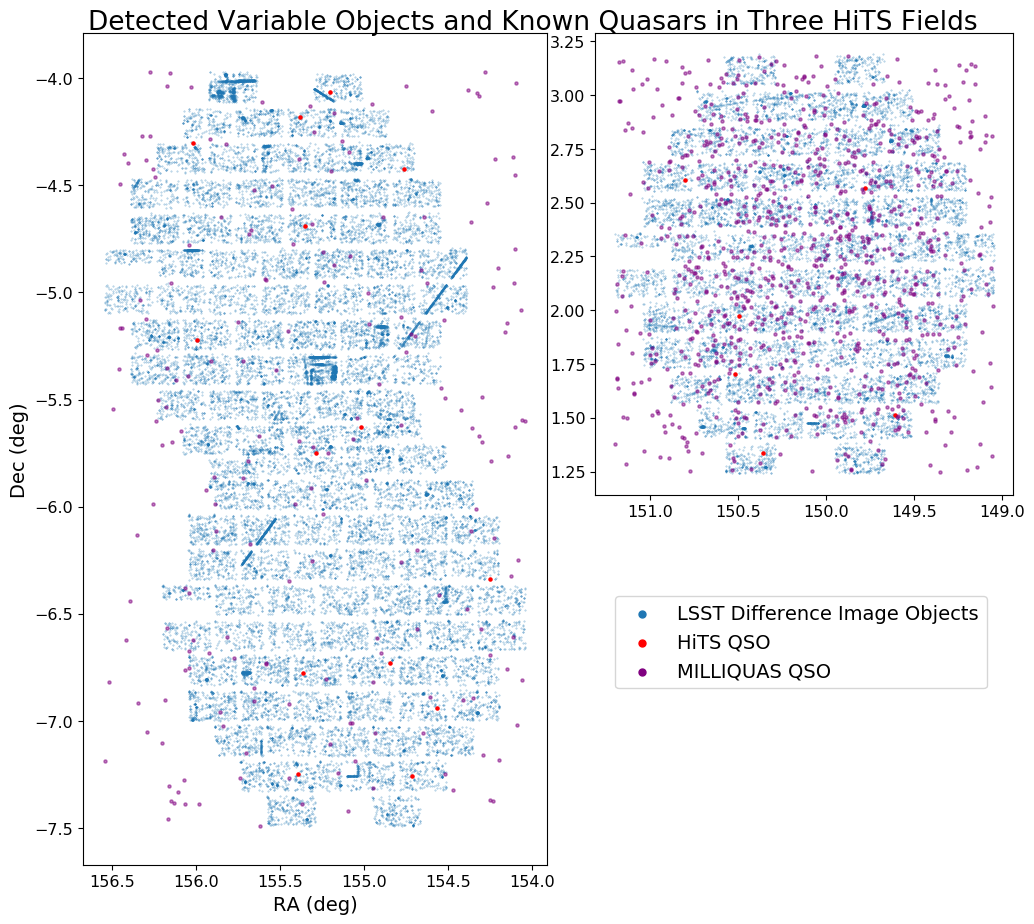

In [31]:
plot_objects_on_sky2(ra1_first, dec1_first,
                    ra2_first, dec2_first,
                    ra1_second, dec1_second,
                    ra2_second, dec2_second,
                    ra1_third, dec1_third,
                    ra2_third, dec2_third)

## Plotting Quasar Light Curves

In [32]:
#
##
###
####
##### Is this docstring okay?
####
###
##
#

def plotTwoLightcurves(idx, hitsDf, matchIndices, 
                       dbPath='/epyc/users/mrawls/hits2015/rerun/cw_2020_02/association.db',
                       lcPath='/epyc/users/tw94/light_curves_full',
                       plotSourceCatLightCurve=False,
                       NSources=10):
    '''Plot a light curve for a DIA (Difference Image Analysis) Object
    from an LSST APDB (Alert Production database), and plot the light curve
    for the same object as measured by the HiTS data release.
    
    Parameters
    ----------
    idx : integer
        specify which of 0-164 HiTS DR1 variables you would like to plot
    hitsDf : Pandas Dataframe containing containing variable objects (HiTS) info {needs internalID}
    matchIndices : list or array of integers
        the indices are for lsstCoords corresponding to hitsCoords 0, 1, 2, ...
    

    dbPath : Path on disk to an APDB we can load DIA Objects or DIA Sources from
        often the database is named `association.db`
    lcPath : Path on disk to light curves from HiTS DR1
    plotSourceCatLightCurve : boolean, try retrieving source catalog fluxes from LSST for comparison?
        default is False, this is slow but more accurate than forced photometry

    '''
    # Check and see if there are more than NSources comprising the Object, and decide whether to plot it or not
    if goodObj.iloc[matchIndices[idx]]['nDiaSources'] < NSources:
        print(f'Skipping HiTS index {idx} (LSST index {matchIndices[idx]}), fewer than {NSources} DIA Sources in the LSST DIA Object')
        return

    # Use the match index to retrieve the DIA Object ID
    obj = goodObj.iloc[matchIndices[idx]]['diaObjectId']
        
    # Load all sources for this object only
    connection = sqlite3.connect(dbPath)
    forcedSrcTable = pd.read_sql_query(f'select diaObjectId, midPointTai, psFlux, psFluxErr, totFlux, totFluxErr \
                                       from DiaForcedSource where diaObjectId = {obj};', connection)
    srcTable = pd.read_sql_query(f'select diaObjectId, midPointTai, ccdVisitId, psFlux, psFluxErr, totFlux, totFluxErr \
                                 from DiaSource where diaObjectId = {obj};', connection)

    # Convert flux to magnitude
    mags = (np.array(forcedSrcTable['totFlux'])*u.nJy).to(u.ABmag)
    magErrs = 1.0857 / forcedSrcTable['totFluxErr'] / forcedSrcTable['totFlux']
    forcedSrcTable['mags'] = mags
    forcedSrcTable['magErrs'] = magErrs
    
    mags = (np.array(srcTable['totFlux'])*u.nJy).to(u.ABmag)
    magErrs = 1.0857 / srcTable['totFluxErr'] / srcTable['totFlux']
    srcTable['mags'] = mags
    srcTable['magErrs'] = magErrs
    
    plt.figure(figsize=(10,4))
    
    # Retrieve the correct row from the HiTS DR1 dataframe for plotting
    # Use the information in that row to retrieve a HiTS light curve file
    hitsRow = hitsDf.iloc[idx]
    tok = hitsRow['internalID'].split('_')
    field = '_'.join([tok[0], tok[1]])
    ccd = tok[2]
    lightcurveFile = field + '_' + ccd + '_LC_50.tar.gz'
    tarball = tarfile.open(os.path.join(lcPath, field, ccd, lightcurveFile))
    data = tarball.extractfile(hitsRow['internalID'].rstrip() + '_g.dat')
    dfl = pd.read_csv(data, sep='\t')  # load a file with light curve data into a pandas dataframe
    
    # Get some fun classification info about the object from HiTS
    predicted_class = hitsRow['Predicted_class'].strip()
    class_probability = hitsRow[f"{predicted_class}_Prob"]
    
    # Plot the LSST light curve (forced PSF photometry on calexp at DIASource position)
    plt.errorbar(srcTable['midPointTai'], srcTable['mags'], 
                 yerr=srcTable['magErrs'], ls=':', marker='o', label='LSST Calexp DiaSource', color='C1')
    
    # Plot the LSST light curve (forced PSF photometry on calexp at DIAObject position)
    plt.errorbar(forcedSrcTable['midPointTai'], forcedSrcTable['mags'], 
                 yerr=forcedSrcTable['magErrs'], ls=':', marker='o', label='LSST Calexp DiaObject', color='C0')
    
    # Plot the LSST light curve directly from source catalogs
    if plotSourceCatLightCurve:
        objTable = pd.read_sql_query('select diaObjectId, ra, decl, nDiaSources \
                              from DiaObject where validityEnd is NULL;', connection)
        sourceCatTimes, sourceCatMags, sourceCatMagErrs = getSourceCatLightCurve(obj, objTable, srcTable, butler)
        plt.errorbar(sourceCatTimes, sourceCatMags, yerr=sourceCatMagErrs, ls=':', marker='o', label='LSST SourceCat', color='C2')
    
    # Plot the HiTS light curve
    plt.errorbar(dfl.MJD, dfl.MAG_AP1, dfl.MAGERR_AP1, marker='o', ls=':', label='HiTS', color='C3')

    # Add some plot labels, and reverse the y-axis so bright stuff is at the top
    plt.gca().invert_yaxis()
    plt.xlabel('Time (MJD)')
    plt.ylabel('magnitude')

    plt.title(f"HiTS classification: {predicted_class} | Probability: {class_probability:0.2f}")
    plt.legend(frameon=False, prop={'size': 16})

LSST mags are based on forced PSF Photometry on processed visit images.

In [33]:
#
##
###
####
##### and this one?
####
###
##
#

def getSourceCatLightCurve(obj, objTable, srcTable, butler):
    '''Retrieve source catalog flux for a DIA Object.
    Parameters
    ----------
    obj : DIA Object ID
    objTable : DIA Object table containing one row for object "obj", as a Pandas Dataframe
    srcTable : DIA Source table containing sources associated into "obj", as a Pandas Dataframe
    butler : LSST Science Pipelines Butler instance, for accessing source catalog data
    Returns
    -------
    sourceCatTimes : list of times for "obj"
    sourceCatMags : list of magnitudes for "obj"
    sourceCatMagErrs : list of magnitude errors for "obj"
    '''
    skyCoordObj = SkyCoord(objTable['ra'], objTable['decl'], unit=u.deg)
    sourceCatTimes = []
    sourceCatMags = []
    sourceCatMagErrs = []
    for visit in srcTable['ccdVisitId']: 
        dataId = {'visit': int(str(visit)[0:6]), 'ccdnum': int(str(visit)[6:])}
        visit_info = butler.get('calexp_visitInfo', dataId=dataId)
        time = visit_info.getDate().get(system=DateTime.MJD)
        sourceCatTimes.append(time)
        photoCalib = butler.get('calexp_photoCalib', dataId=dataId)
        calsrc = butler.get('src', dataId=dataId)  # this is the full source catalog for that visitID
        calsrcAstropy = calsrc.asAstropy()
        # Find the single source that matches most closely with our object RA and Dec
        calsrcSkyCoord = SkyCoord(calsrcAstropy['coord_ra'], calsrcAstropy['coord_dec'], unit=u.rad)
        matchIdx, matchAngle, match3d = skyCoordObj.match_to_catalog_sky(calsrcSkyCoord)
        calibMag = photoCalib.instFluxToMagnitude(calsrc, 'base_PsfFlux')[matchIdx]
        sourceCatMags.append(calibMag[0,0])
        sourceCatMagErrs.append(calibMag[0,1])
    return sourceCatTimes, sourceCatMags, sourceCatMagErrs

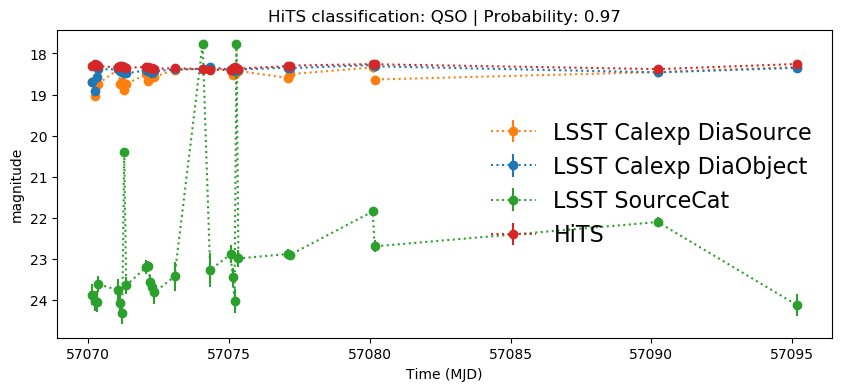

In [54]:
plotTwoLightcurves(3, hitsDf=hitsDfQSO, matchIndices=idxRef, plotSourceCatLightCurve=True, NSources=1)

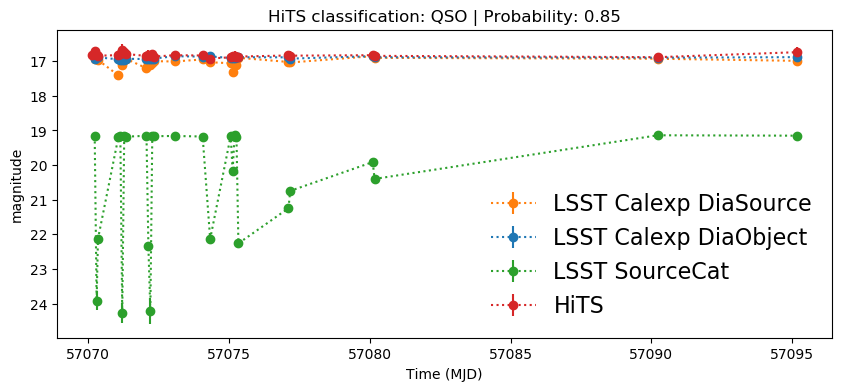

In [55]:
plotTwoLightcurves(5, hitsDf=hitsDfQSO, matchIndices=idxRef, plotSourceCatLightCurve=True, NSources=1)

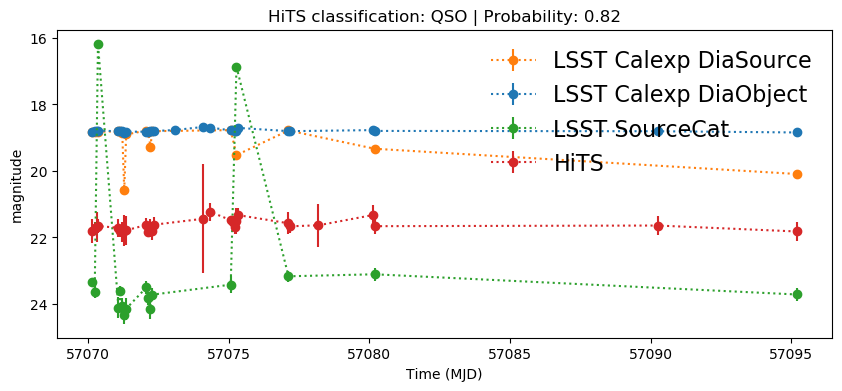

In [48]:
plotTwoLightcurves(7, hitsDf=hitsDfQSO, matchIndices=idxRef, plotSourceCatLightCurve=True, NSources=1)

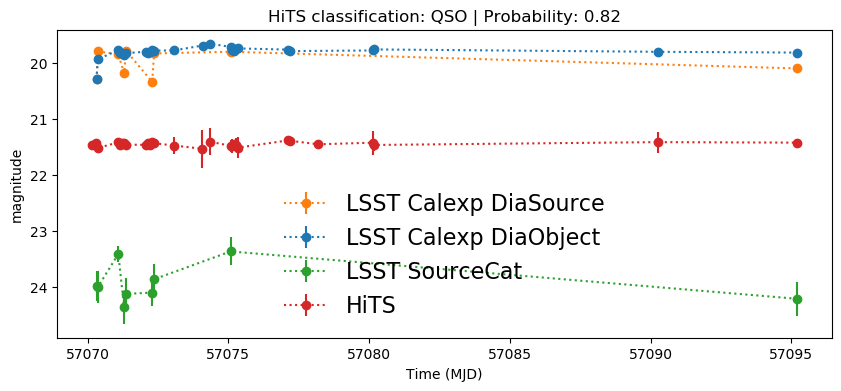

In [49]:
plotTwoLightcurves(14, hitsDf=hitsDfQSO, matchIndices=idxRef, plotSourceCatLightCurve=True, NSources=1)

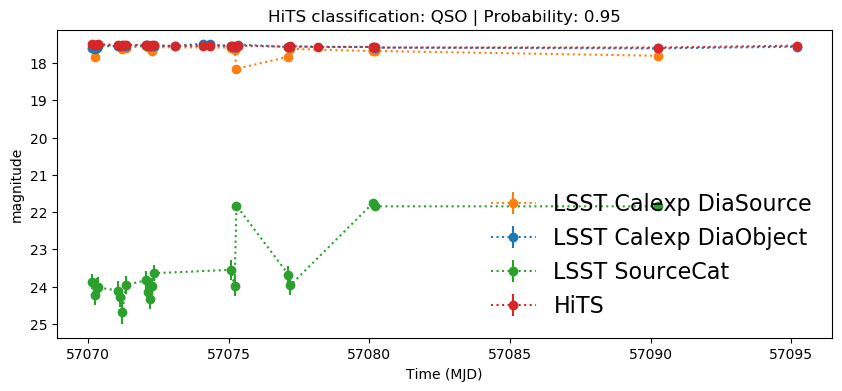

In [56]:
plotTwoLightcurves(15, hitsDf=hitsDfQSO, matchIndices=idxRef, plotSourceCatLightCurve=True, NSources=1)

### Adding a Snapshot Image

In [35]:
#Pulling the diaObcjedIds from the MILLIQUAS dataframe and using them to pull the assocaited ccdVisitIds from the source table
diaObjectIdArray = MILLIDf['diaObjectId'].values
ccdVisitIds = []
for i in range(len(diaObjectIdArray)):
    Q = srcTableAll['ccdVisitId'].loc[srcTableAll['diaObjectId'] == diaObjectIdArray[i]].values
    ccdVisitIds.append(Q[0]) #grabbing the zeroth element to save ONE source for the snapshot

In [36]:
#Splitting the ccd from the visit ID and saving them into a new column in the dataframe
MILLIDf['ccdVisitId'] = ccdVisitIds
MILLIDf['ccd'] = MILLIDf.ccdVisitId.apply(lambda x: str(x)[-2:])
MILLIDf['Visit'] = MILLIDf.ccdVisitId.apply(lambda x: str(x)[:-2])

In [37]:
MILLIDf.head()

,ra,dec,ra_deg,dec_deg,bmag,rmag,redshift,radio_name,xray_name,lii,...,ref_name,ref_redshift,qso_prob,class,idx,d2d_deg,diaObjectId,ccdVisitId,ccd,Visit
0,09 57 23.69,+01 14 58.7,149.348708,1.249639,19.73,19.44,2.484,,,237.26096,...,DR14Q,DR14Q,,QSO TYPE 1,39116,0.234868,176486889161752879,41091556,56,410915
1,10 03 05.70,+01 15 03.5,150.773750,1.250972,20.98,19.83,0.748,,,238.38186,...,2QZ,2QZ,,QSO TYPE 1,18215,0.185993,176547031588798698,41105559,59,411055
2,10 00 18.59,+01 15 06.1,150.077458,1.251694,21.36,19.95,0.861,,,237.82779,...,2QZ,2QZ,,QSO TYPE 1,3314,0.137841,176547035883766087,41105560,60,411055
3,09 56 47.47,+01 15 23.9,149.197792,1.256639,17.39,14.58,0.064,FIRST J095647.4+011523,,237.13686,...,PGC,DR16,100,AGN UNCLASSIFIED,39116,0.354526,176486889161752879,41091556,56,410915
4,10 02 07.77,+01 15 27.2,150.532375,1.257556,21.19,20.37,2.517,,,238.18185,...,DR14Q,DR14Q,,QSO TYPE 1,31159,0.000027,176486914931556904,41091562,62,410915


In [38]:
#Defining a new dataframe where the coordinates of the MILLIQUAS QSOs are within 0.0001 angular degrees from the HiTS objects
MILLI_close = MILLIDf.loc[MILLIDf['d2d_deg'] < 0.0001]

In [39]:
def snapshotplots(idx, dataFrame = MILLI_close):
    '''
    
    This function plots a snapshot image of a single source.
    
    Parameters:
        idx: index of the source you want to plot
        dataframe: what dataframe you want to pull the source from
        
    '''
    #fanangeling the axes to make sure the image has a uniform border (for use in later plots) and setting size of image
    plt.tick_params(labeltop=True, labelright=True)
    plt.axis('off')
    size = lsst.geom.Extent2I(25, 25) # measured in pixels
    
    #
    ##
    ###
    ####
    ##### need to understand this section more
    ####
    ###
    ##
    #
    dataId = {'visit': float(dataFrame['Visit'].iloc[idx]), 'ccd': float(dataFrame['ccd'].iloc[idx])}
    calexp = butler.get('calexp', dataId = dataId)
    centerSource = lsst.geom.SpherePoint(dataFrame['ra_deg'].iloc[idx], dataFrame['dec_deg'].iloc[idx], lsst.geom.degrees)
    calexpArray = calexp.getCutout(centerSource, size).getMaskedImage().getImage().getArray()
    norm = ImageNormalize(calexpArray, interval=ZScaleInterval(), stretch=SqrtStretch())
    
    #Plotting the image
    plt.imshow(calexpArray, cmap='gray', norm=norm, origin='lower')

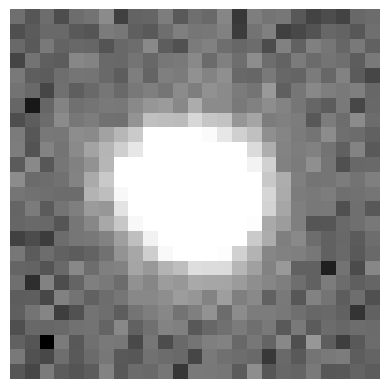

In [40]:
snapshotplots(1)

In [41]:
def plotLSSTLightcurveAndSnapshot(idx, diaObjectId, dbPath='/epyc/users/mrawls/hits2015/rerun/cw_2020_02/association.db'):
    ''' 
    This function plots the LSST light curve and the objects associated snapshot image from a single visit.
    
    Parameters:
        idx:
        diaObjectId:
        dbPath:
    '''    
    #set up the figure
    fig = plt.figure(figsize = (18,6))
    gs = plt.GridSpec(1, 2, width_ratios=[12, 6])
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    
    # Load all sources for this object only
    connection = sqlite3.connect(dbPath)
    forcedSrcTable = pd.read_sql_query(f'select diaObjectId, midPointTai, psFlux, psFluxErr, totFlux, totFluxErr \
                                       from DiaForcedSource where diaObjectId = {diaObjectId};', connection)
    srcTable = pd.read_sql_query(f'select diaObjectId, midPointTai, ccdVisitId, psFlux, psFluxErr, totFlux, totFluxErr \
                                 from DiaSource where diaObjectId = {diaObjectId};', connection)

    
    #Generate the plot title
    if MILLI_close['xray_name'].iloc[idx] != '                      ':
        fig.suptitle(f'Xray Name: {MILLI_close["xray_name"].iloc[idx]}\n Class: {MILLI_close["class"].iloc[idx].lstrip()}',x = .495 , y = 0.95, ha = 'center', fontsize = 14)
    elif MILLI_close['radio_name'].iloc[idx] != '                      ':
        fig.suptitle(f'Radio Name: {MILLI_close["radio_name"].iloc[idx]}\n Class: {MILLI_close["class"].iloc[idx].lstrip()}',x = .495 , y = 0.95, ha = 'center', fontsize = 14)
    else:
        fig.suptitle(f'Xray/Radio Name: N/A\n Class: {MILLI_close["class"].iloc[idx].lstrip()}',x = .495 , y = 0.95, ha = 'center', fontsize = 14)
  
    # Plot the LSST light curve (forced PSF photometry on calexp at DIASource position)
    ax1.errorbar(srcTable['midPointTai'], srcTable['totFlux'], 
                 yerr=srcTable['totFluxErr'], ls=':',linewidth = 3, marker='o',markersize = 8,
                 label='LSST Source', color='darkcyan')
    
    

    # Add some plot labels, and reverse the y-axis so bright stuff is at the top
    ax1.set_xlabel('Time (MJD)', fontsize = 14)
    ax1.set_ylabel('Instantaneous Flux (nJy)', fontsize = 14)
    #plt.legend(frameon=False, prop={'size': 16})
    
    #plot the snapshot image
    ax2.tick_params(labeltop=True, labelright=True)
    ax2.axis('off')
    dataId = {'visit': float(MILLIDf['Visit'].iloc[idx]), 'ccd': float(MILLIDf['ccd'].iloc[idx])}
    calexp = butler.get('calexp', dataId = dataId)
    centerSource = lsst.geom.SpherePoint(MILLIDf['ra_deg'].iloc[idx], MILLIDf['dec_deg'].iloc[idx], lsst.geom.degrees)
    size = lsst.geom.Extent2I(25, 25)
    calexpArray = calexp.getCutout(centerSource, size).getMaskedImage().getImage().getArray()
    norm = ImageNormalize(calexpArray, interval=ZScaleInterval(), stretch=SqrtStretch())
    ax2.imshow(calexpArray, cmap='gray', norm=norm, origin='lower', aspect = 'auto')

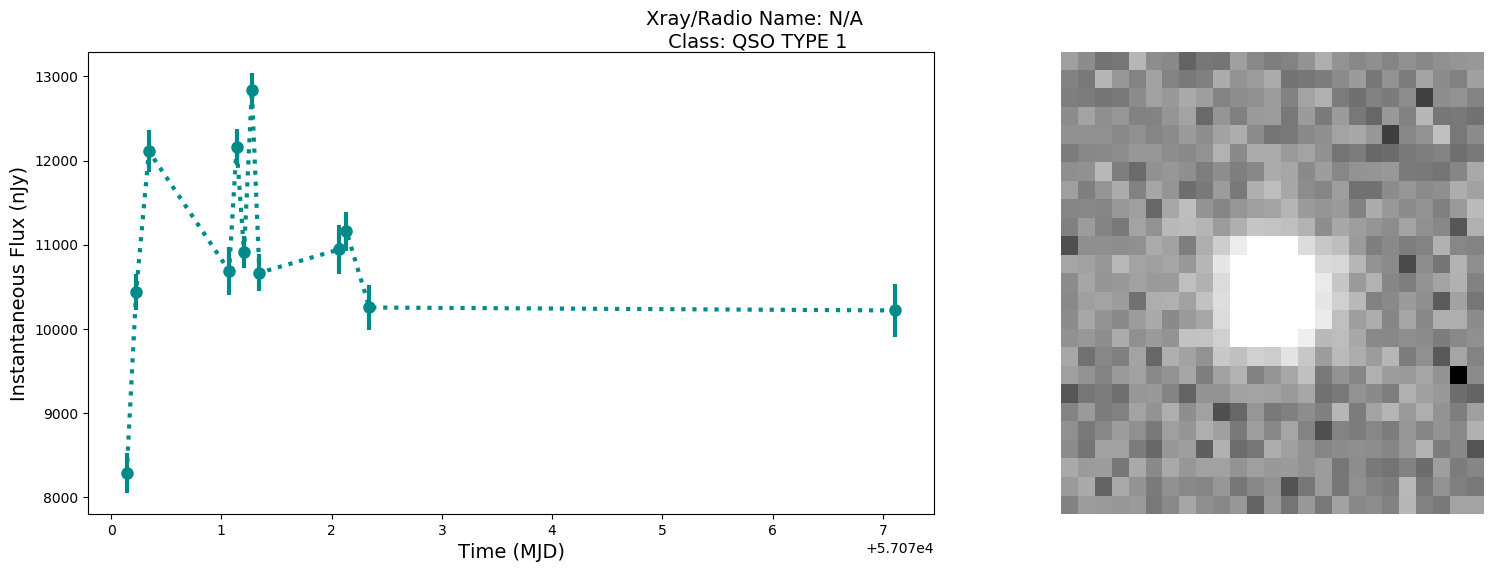

In [42]:
plotLSSTLightcurveAndSnapshot(4, MILLIDf['diaObjectId'].iloc[4])

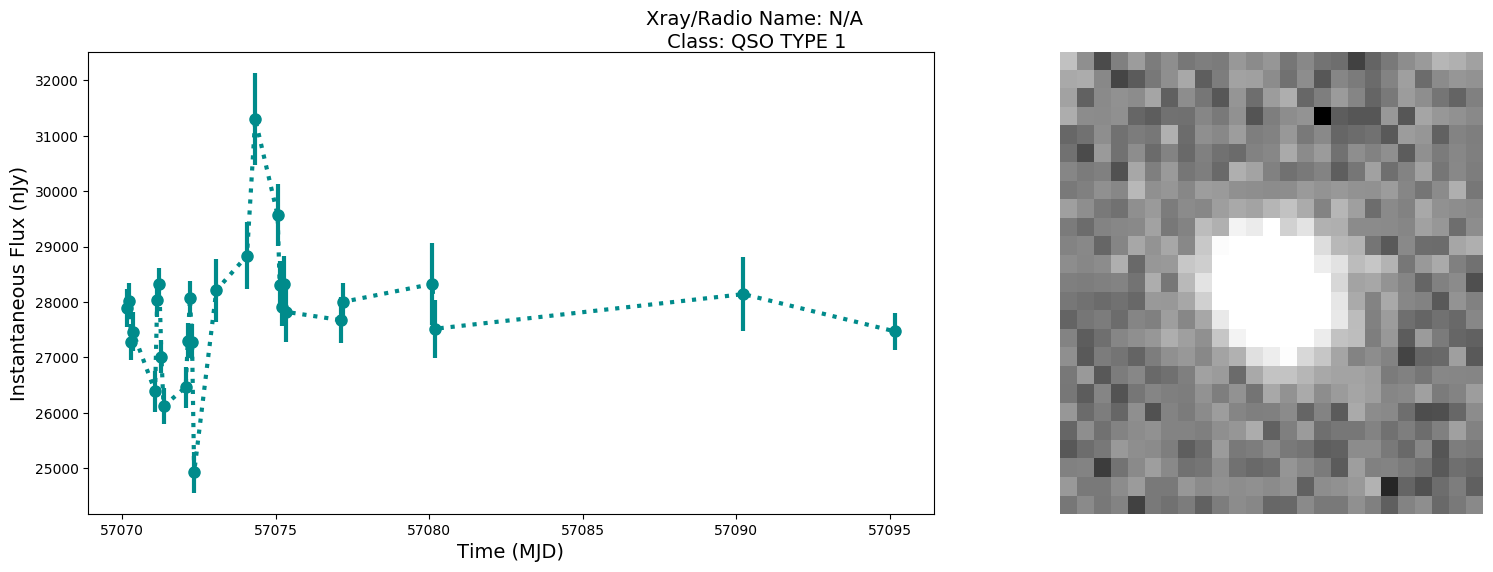

In [57]:
plotLSSTLightcurveAndSnapshot(7, MILLIDf['diaObjectId'].iloc[7])

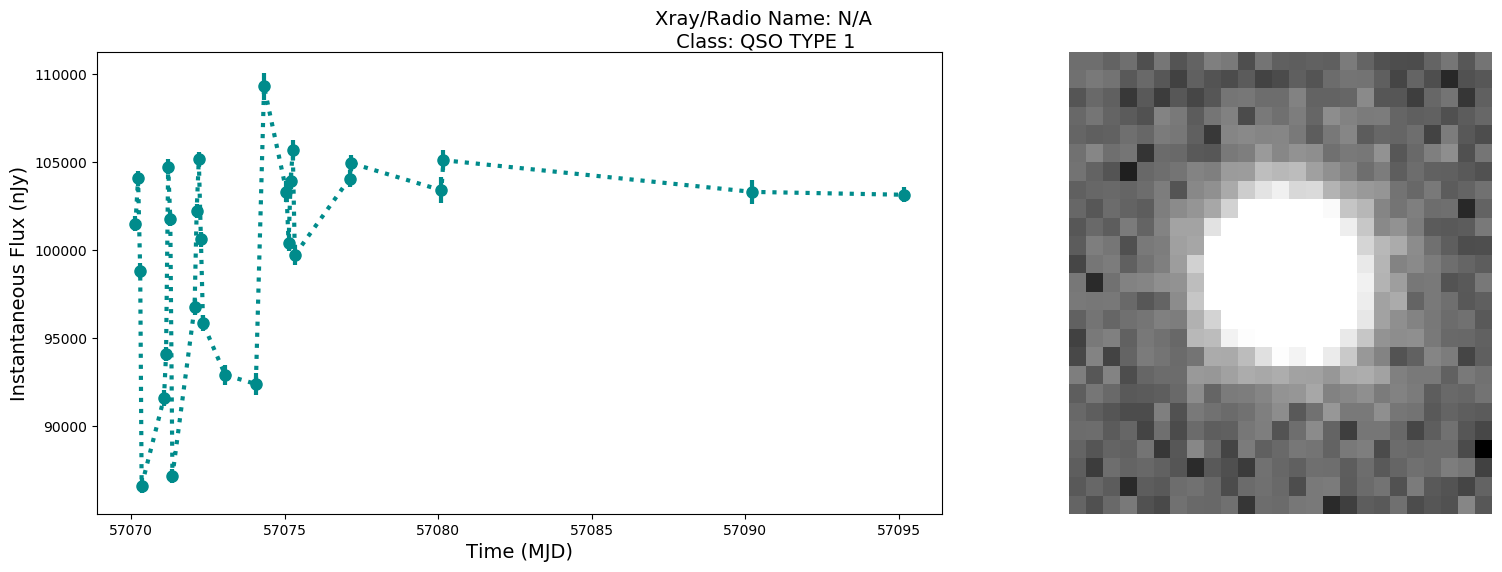

In [61]:
plotLSSTLightcurveAndSnapshot(12, MILLIDf['diaObjectId'].iloc[12])

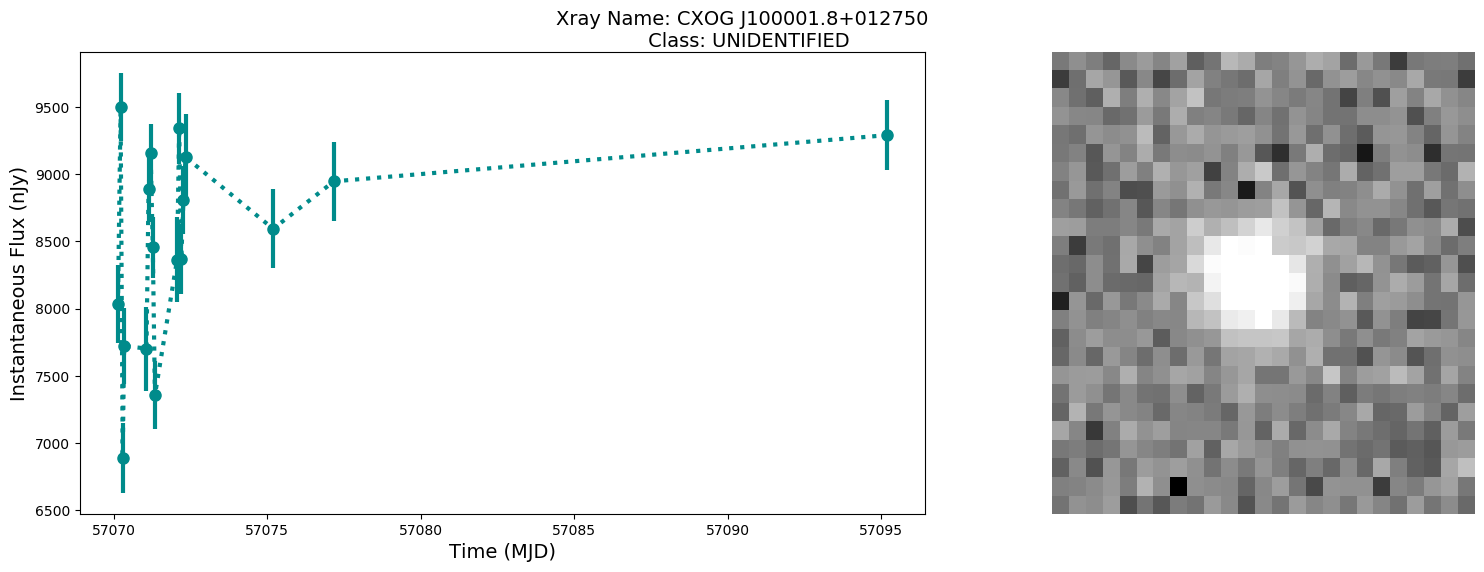

In [62]:
plotLSSTLightcurveAndSnapshot(14, MILLIDf['diaObjectId'].iloc[14])

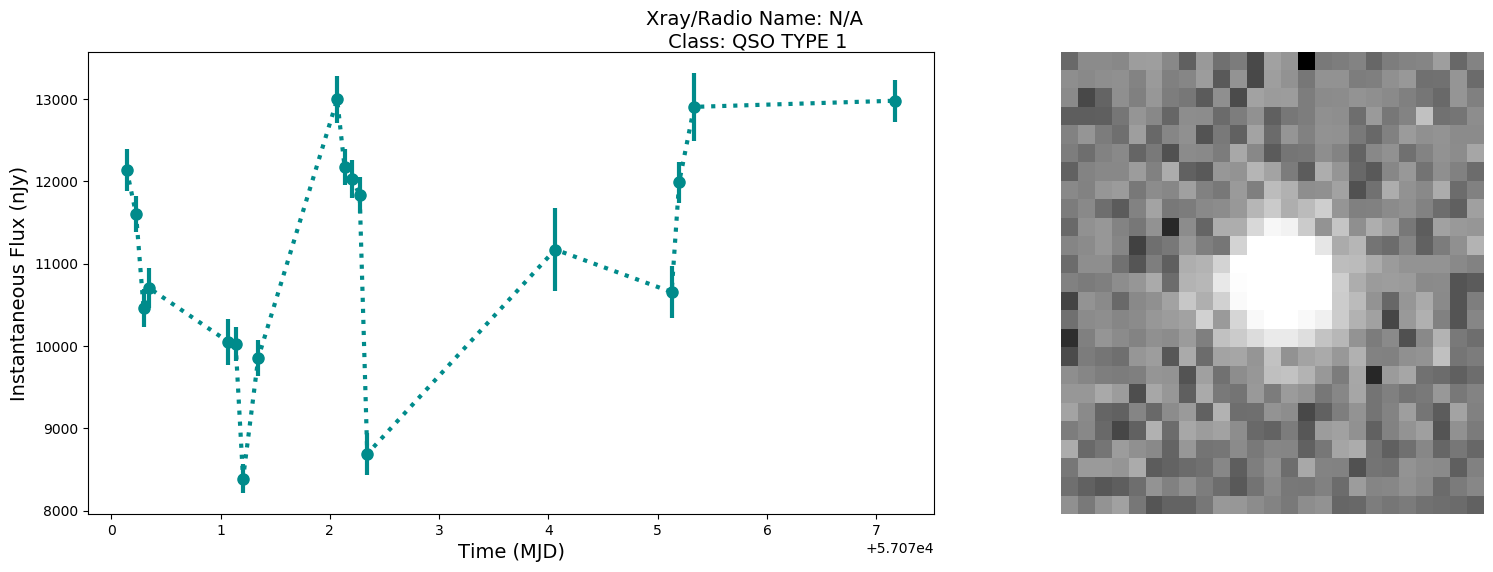

In [66]:
plotLSSTLightcurveAndSnapshot(17, MILLIDf['diaObjectId'].iloc[17])